In [10]:
import numpy as np
import pyvista as pv
from pathlib import Path
from PIL import Image
from tqdm import tqdm
from hydrogen_plotting import (get_wavefunction_contour_mesh, plot_contour_mesh,
                               get_wavefunction_volume_mesh, plot_glyphs_grid)

In [ ]:
for n in range(1, 5 + 1):
    for l in range(0, n):
        for m in range(-l, l+1):
#             (n, l, m) = (2, 0, 0)
            print(f'#### ({n}, {l}, {m}) ####')
            real_version = True
            clip = True
            clip_axes='xyz'
            n_steps = 351
            prob_enclosed = 0.6
            contour_mesh = get_wavefunction_contour_mesh(n, l, m, n_steps=n_steps,
                                                         prob_enclosed_list=(prob_enclosed,),
                                                         real_version=real_version,
                                                         clip=clip,
                                                         clip_axes=clip_axes,
                                                         map_opacity=False)

            plotter = pv.Plotter(off_screen=True)
            p = plot_contour_mesh(contour_mesh, smooth_shading=True,
                                  roughness=0, specular=1, diffuse=1, ambient=0,
                                  style='surface', show=False, plotter=plotter, show_grid=False)
            p.add_text(f'(n, l, m) = ({n}, {l}, {m})', font_size=32)

            file_path = Path(Path.cwd(), 'real orbital snaps', f'real_{n}_{l}_{m}.png')
            print(file_path)
            p.screenshot(filename=file_path)
            print('done')

#### (1, 0, 0) ####
Setup...
Setup took 28.534 s
Get wavefunction...
Wavefunction took 48.261 s
Get RGB...
RGB took 39.165 s
Get probability thresholds...
Probability thresholds took 11.799 s
Get Pyvista grid...
Pyvista grid took 51.215 s
Get contour...
Contour took 5.146 s
Total time: 188.568 s
C:\Users\Justin\Desktop\Working\Code\hydrogen plotting\real orbital snaps\real_1_0_0.png
done
#### (2, 0, 0) ####
Setup...
Setup took 4.718 s
Get wavefunction...
Wavefunction took 44.867 s
Get RGB...


1, 0, 0
2, 0, 0
2, 1, -1
2, 1, 0
2, 1, 1
3, 0, 0
3, 1, -1
3, 1, 0
3, 1, 1
3, 2, -2
3, 2, -1
3, 2, 0
3, 2, 1
3, 2, 2
4, 0, 0
4, 1, -1
4, 1, 0
4, 1, 1
4, 2, -2
4, 2, -1
4, 2, 0
4, 2, 1
4, 2, 2
4, 3, -3
4, 3, -2
4, 3, -1
4, 3, 0
4, 3, 1
4, 3, 2
4, 3, 3
5, 0, 0
5, 1, -1
5, 1, 0
5, 1, 1
5, 2, -2
5, 2, -1
5, 2, 0
5, 2, 1
5, 2, 2
5, 3, -3
5, 3, -2
5, 3, -1
5, 3, 0
5, 3, 1
5, 3, 2
5, 3, 3
5, 4, -4
5, 4, -3
5, 4, -2
5, 4, -1
5, 4, 0
5, 4, 1
5, 4, 2
5, 4, 3
5, 4, 4


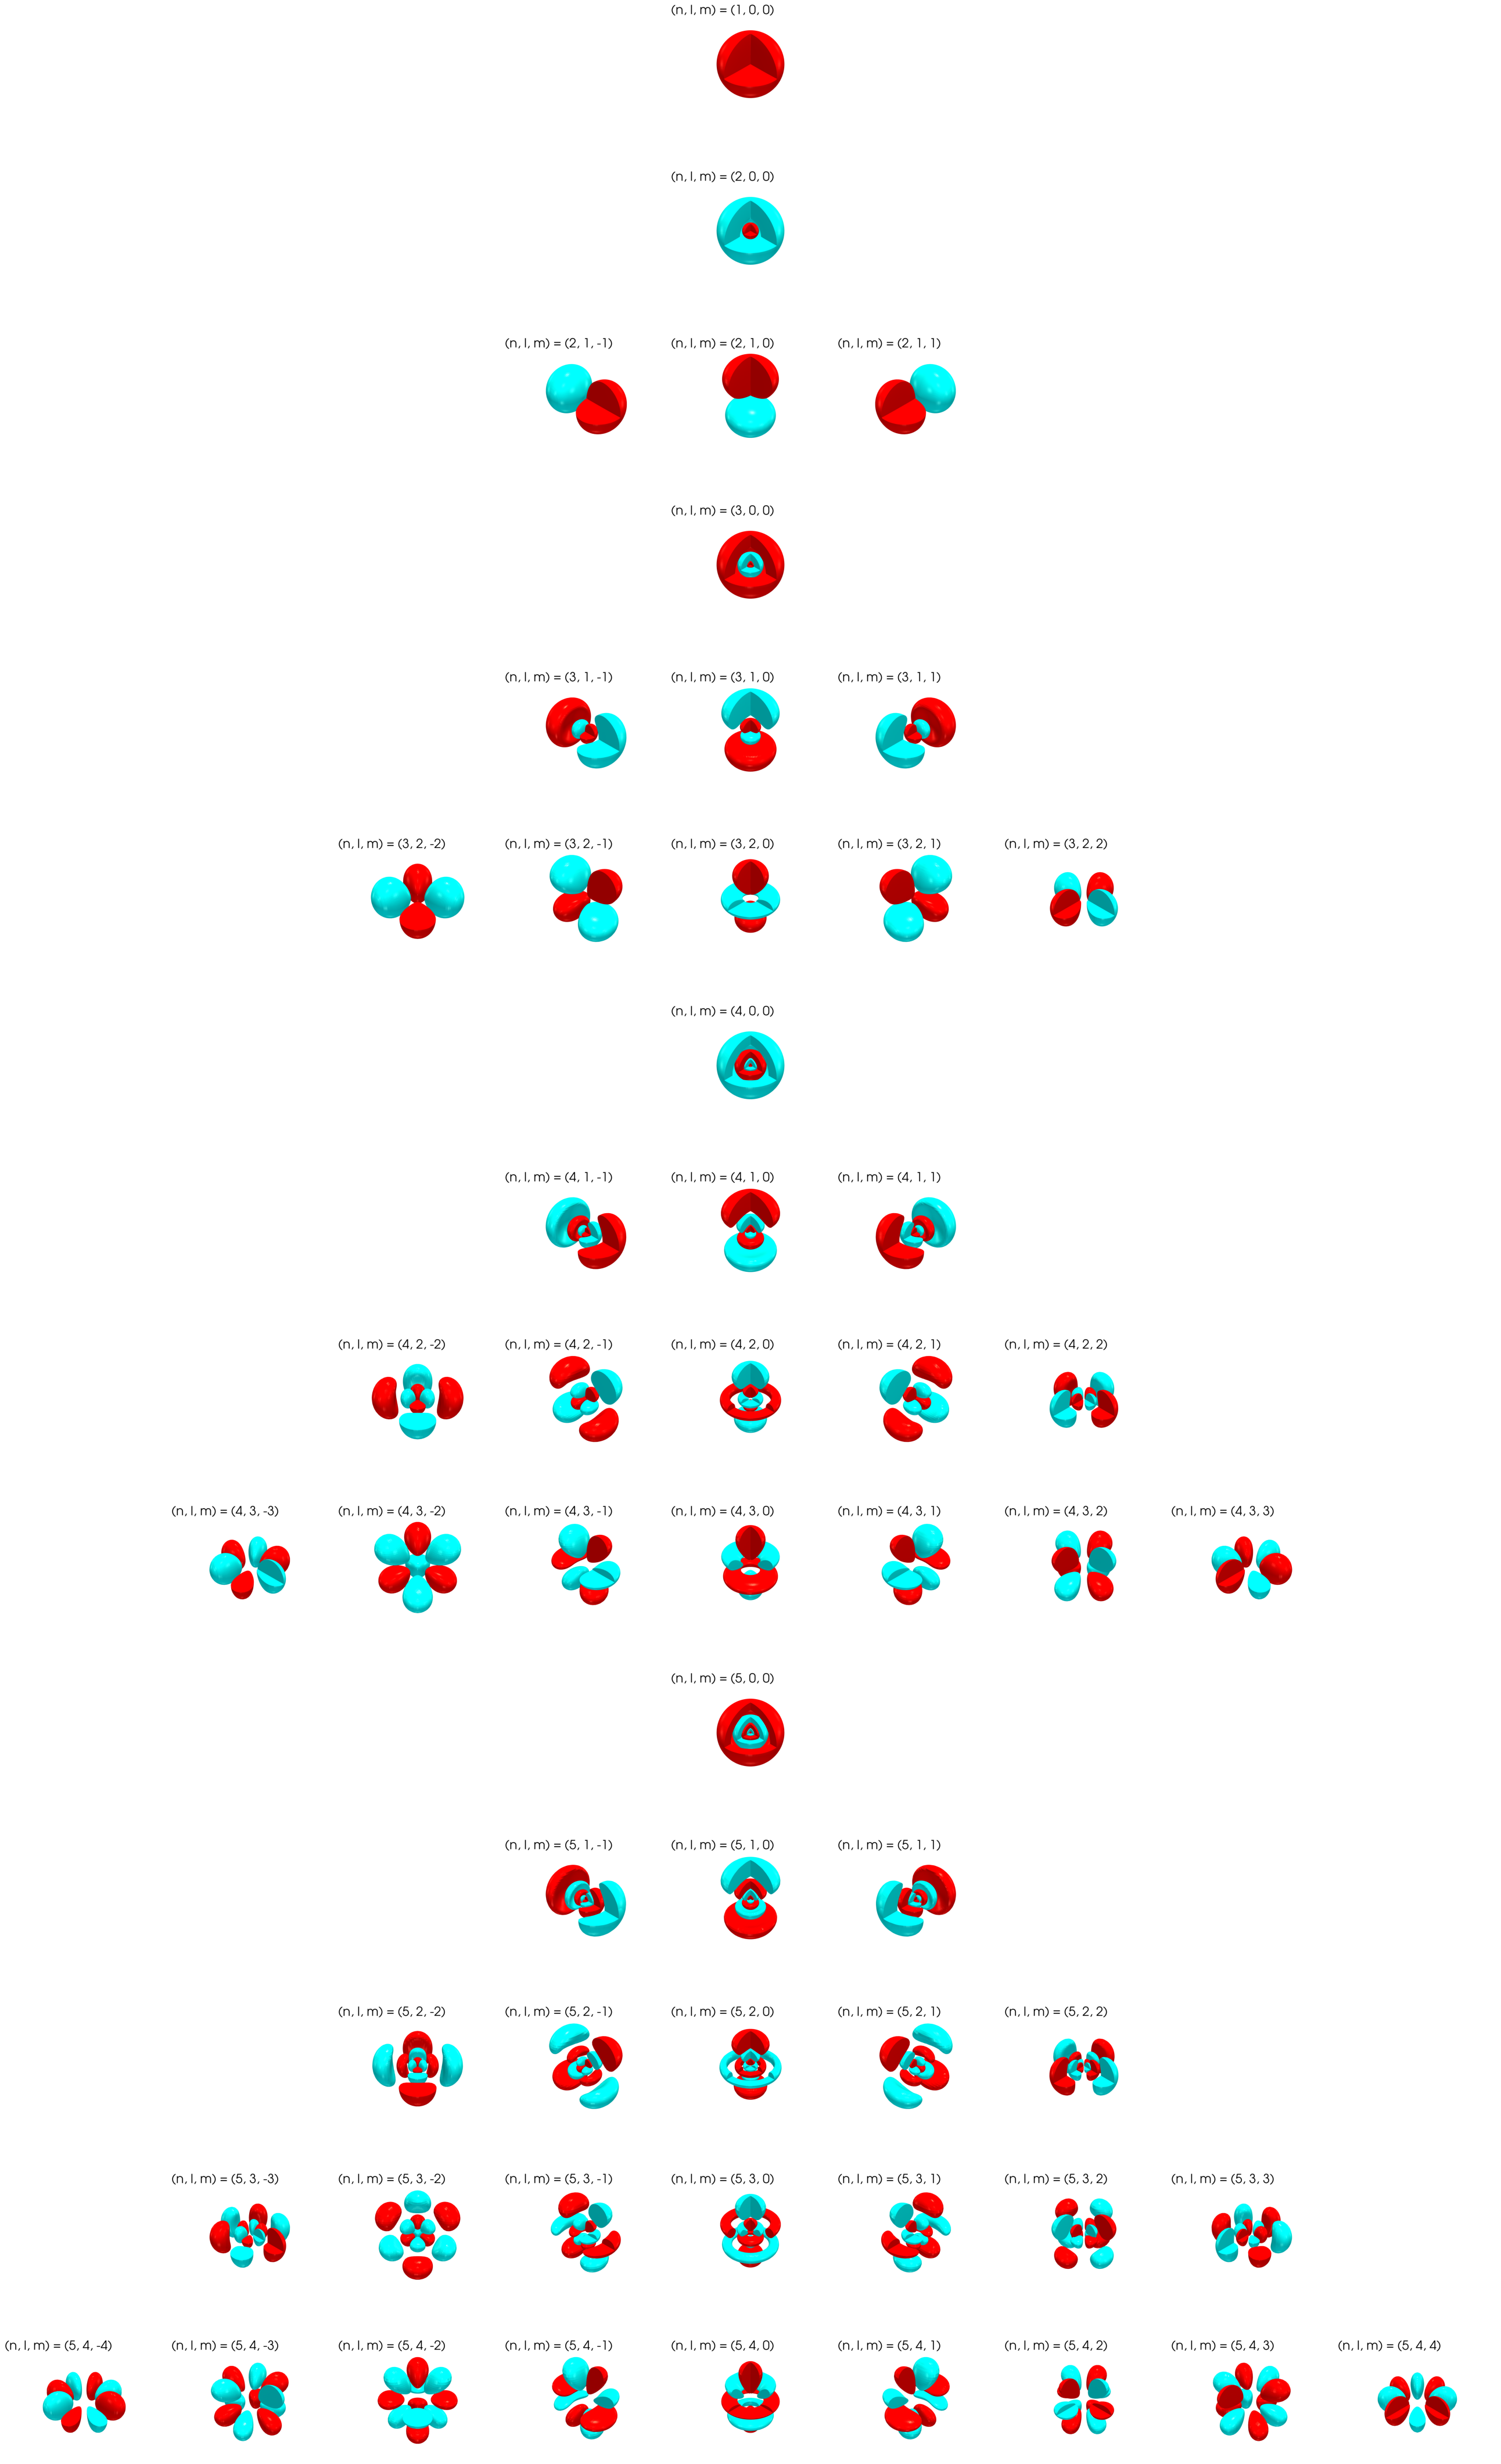

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

n_max = 5
num_rows = int(n_max * (n_max + 1) / 2)
lmax_tot = n_max - 1
num_cols = 2 * lmax_tot + 1

fig = plt.figure(figsize=(num_cols*4, num_rows*4))

# fig = plt.figure()
for n in range(1, n_max + 1):
    for l in range(0, n):
        for m in range(-l, l+1):
            print(f'{n}, {l}, {m}')
            file_path = Path(Path.cwd(), 'figures', 'indiv_orbitals', 'real', f'{n}_{l}_{m}.png')

            image = mpimg.imread(file_path)
            row = int((n - 1) * n / 2 + l)
            col = m + lmax_tot
            idx = row * num_cols + col + 1
            
            ax = fig.add_subplot(num_rows, num_cols, idx)
            ax.imshow(image)
            ax.axis('off')
            
table_figure_path = Path(Path.cwd(), 'figures', 'real_orbital_table')
fig.savefig(table_figure_path)
fig.set_tight_layout(True)
plt.show()

In [44]:
num_rows*300

4500

In [3]:
n_steps=101
glyphs_grid = get_wavefunction_volume_mesh(n, l, m, n_steps=n_steps,
                                           real_version=False, span=None)

p = plot_glyphs_grid(glyphs_grid, show_grid=False)

In [38]:
def plot_orbital_table(n_max, n_steps=101, prob_enclosed_list=(0.6,), real_version=False, map_opacity=False,
                       figure_dir=None, figure_name='orbital_table', clip=False, clip_axes='xyz', **kwargs):
    if figure_dir is None:
        figure_dir = Path.cwd()
    figure_dir.mkdir(exist_ok=True, parents=True)
    file_path = Path(figure_dir, figure_name).with_suffix('.png')
    
    num_rows = int(n_max * (n_max + 1) / 2)
    lmax_tot = n_max - 1    
    num_cols = 2 * lmax_tot + 1
    plotter = pv.Plotter(shape=(num_rows, num_cols), 
                         border=False, notebook=False,
                         window_size=[num_cols*200, num_rows*200],
                         off_screen=True)
    for n in range(n_max + 1):
        lmax = n - 1
        for l in range(0, lmax + 1):
            for m in range(-l, l+1):
                row = int((n - 1) * n / 2 + l)
                col = m + lmax_tot
                
                print(n, l, m)
                plotter.subplot(row, col)    

                contour_mesh = get_wavefunction_contour_mesh(n, l, m, n_steps=n_steps,
                                                             prob_enclosed_list=prob_enclosed_list,
                                                             real_version=real_version,
                                                             clip=clip, clip_axes=clip_axes,
                                                             map_opacity=map_opacity)
                plot_contour_mesh(contour_mesh, show=False, plotter=plotter, show_grid=False, **kwargs)
                plotter.add_text(f'(n, l, m) = ({n}, {l}, {m})', font_size=9)
    plotter.screenshot(filename=file_path)
    print('done')

In [42]:
figure_dir = Path(Path.cwd(), 'figures', 'Orbitals')

figure_name = 'complex_orbital_n=5'
plot_orbital_table(n_max=5, n_steps=151, clip=True, 
                   real_version=False,
                   figure_dir=figure_dir, figure_name=figure_name)

figure_name = 'real_orbital_n=5'
plot_orbital_table(n_max=5, n_steps=151, clip=True, 
                   real_version=True,
                   figure_dir=figure_dir, figure_name=figure_name)

1 0 0
2 0 0
2 1 -1
2 1 0
2 1 1
3 0 0
3 1 -1
3 1 0
3 1 1
3 2 -2
3 2 -1
3 2 0
3 2 1
3 2 2
4 0 0
4 1 -1
4 1 0
4 1 1
4 2 -2
4 2 -1
4 2 0
4 2 1
4 2 2
4 3 -3
4 3 -2
4 3 -1
4 3 0
4 3 1
4 3 2
4 3 3
5 0 0
5 1 -1
5 1 0
5 1 1
5 2 -2
5 2 -1
5 2 0
5 2 1
5 2 2
5 3 -3
5 3 -2
5 3 -1
5 3 0
5 3 1
5 3 2
5 3 3
5 4 -4
5 4 -3
5 4 -2
5 4 -1
5 4 0
5 4 1
5 4 2
5 4 3
5 4 4
done
1 0 0
2 0 0
2 1 -1
2 1 0
2 1 1
3 0 0
3 1 -1
3 1 0
3 1 1
3 2 -2
3 2 -1
3 2 0
3 2 1
3 2 2
4 0 0
4 1 -1
4 1 0
4 1 1
4 2 -2
4 2 -1
4 2 0
4 2 1
4 2 2
4 3 -3
4 3 -2
4 3 -1
4 3 0
4 3 1
4 3 2
4 3 3
5 0 0
5 1 -1
5 1 0
5 1 1
5 2 -2
5 2 -1
5 2 0
5 2 1
5 2 2
5 3 -3
5 3 -2
5 3 -1
5 3 0
5 3 1
5 3 2
5 3 3
5 4 -4
5 4 -3
5 4 -2
5 4 -1
5 4 0
5 4 1
5 4 2
5 4 3
5 4 4
done
